In [68]:
import numpy as np


def create_network(layers: list[int]):
    """
    创建神经网络的权重矩阵和偏置向量
    """
    network = []
    bias = []
    for i in range(1, len(layers)):
        network.append(np.random.random((layers[i], layers[i-1])))
        bias.append(np.random.random(layers[i]).reshape(-1, 1))

    return network, bias


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def forward(network, bias, X):
    """
    前向传播
    """
    z = [X]
    a = [X]
    for i in range(len(network)):
        X = np.dot(network[i], X) + bias[i]
        z.append(X)
        if i != len(network) - 1:
            X = sigmoid(X)
        a.append(X)
    return z, a


def sigmoid_gradient(a):
    return a * (1 - a)


def backward(network, A, y):
    """
    反向传播
    """
    layers = len(network)
    delta = [0] * layers
    delta[layers - 1] = A[layers] - y  # 输出层的误差
    gradient_W = [0] * layers
    gradient_B = [0] * layers
    for i in range(layers - 2, -1, -1):
        delta[i] = np.dot(network[i + 1].T, delta[i + 1]) * \
            sigmoid_gradient(A[i+1])
    for i in range(layers):
        gradient_W[i] = np.dot(delta[i], A[i].T)
        gradient_B[i] = np.sum(
            delta[i], axis=1, keepdims=True)  # 为什么这里是进行 sum 处理

    return gradient_W, gradient_B


def update_network(network, bias, gradient_W, gradient_B, learning_rate):
    for i in range(len(network)):
        network[i] -= learning_rate * gradient_W[i]
        bias[i] -= learning_rate * gradient_B[i]


def cost(y_hat, y):
    """
    计算损失: 均方误差
    """
    return np.mean(np.sum((y_hat - y) ** 2, axis=0))

In [81]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(0, 1, 0.01).reshape(1, -1)
Y = 10 * np.sin(2 * np.pi * X)

network, bias = create_network([1, 10, 1])
alpha = 0.001

for i in range(10000):
    Z, A = forward(network, bias, X)
    gradient_W, gradient_B = backward(network, A, Y)
    update_network(network, bias, gradient_W, gradient_B, alpha)
    if i % 1000 == 0:
        y_hat = A[-1]
        print(cost(y_hat, Y))

60.15245913604033
5.031882064240068
2.134647929772716
0.8230186614758179
0.297078516390168
0.15731222236215592
0.10364883120684924
0.07467090032896863
0.06650365336082825
0.04444305543410277


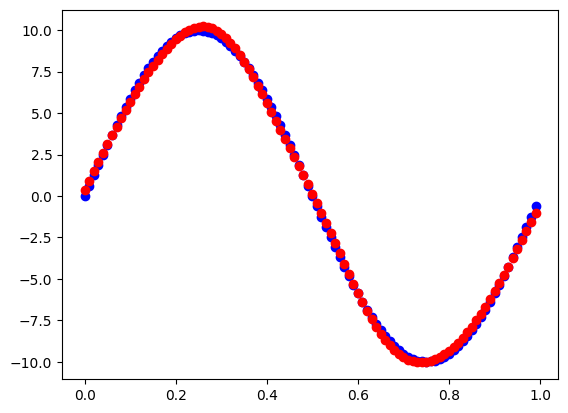

In [80]:
plt.scatter(X, Y, color='blue')
plt.scatter(X, y_hat, color='red')